# 채널 메타 데이터 분석


#### 1. 데이터 수집: 먹방 인기/비인기 유튜버
* 인기 유튜버: 골드버튼을 받은, 구독자 100만 이상의 유튜버 (채널명 / 수집한 영상 수)
    * Hongyu ASMR 홍유 / 295
    * 나도Nado / 578
    * 떵개떵 / 810
    * 산적TV 밥굽남 / 423
    * 야미보이 Yummyboy / 629
    * 입짧은햇님 / 809
* 비인기 유튜버: 실버버튼도 받지 못한, 구독자 10만 미만의 유튜버
    * BENI 유베니 / 40
    * 가오니의 메뉴판GAONI / 28
    * 리폴LeePaul / 103
    * 밍칭mingching / 68
    * 살빼조DietJo / 23
    * 세리티 Serity / 32
   
#### 2. 분석 목적: 인기/비인기 채널의 차이점 발굴
* AI를 활용하여 어떤 유튜버의 인기급상승(떡상) 여부를 예측하기에 앞서 인기 채널과 비인기 채널 간의 차이점을 탐구

#### 3. 분석 결과:
- 영상 길이: 인기 채널이 비인기 채널에 비해 영상 길이가 짧음(Compact)
- 업로드 주기: 인기 채널이 비인기 채널에 비해 업로드 주기가 짧음
- 인기급상승(떡상) 영상 조회수: 인기 채널의 평범한 영상 대비 인기급상승 영상의 조회수 비율은 비인기 채널의 그것보다 높음
    - 또한, 이러한 배율은 구독자수 증가율과 직결되는 경향
    
#### 4. 한계:
- 크롤링한 채널 종류가 부족하여 대표성 부족 -> 지속적인 데이터 수집 필요
- 유튜브 채널 개설 시점, 개설한 지 얼마나 됐는지
- 최대한 동등 기준을 고려해서

좋아요, 조회수, 구독자 수

In [2]:
import os
from glob import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams["font.family"] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

다음과 같이 크게 두 가지를 염두에 두고 분석을 진행

1. (통제 가능한 요소) 유튜버 입장에서 컨트롤할 수 있는 지표
- 영상 업로드 주기
- 영상 길이
- 해시태그
- 썸네일
  
2. (통제 불가능한 요소) 유튜버 입장에서 자신이 잘 해나가고 있는지 확인할 수 있는/측정할 수 있는 지표
- 댓글 양상
    - 댓글 수
    - 댓글에 달린 좋아요 수
    - 외국인 유입 여부(?): 영어 자막 보유 현황을 통해
    - 긍정/부정 표현
    
- 영상 좋아요 수
- 영상 업로드에 따른 구독자 수 증가 추이

In [15]:
pop_channels = ['Hongyu ASMR 홍유', '나도Nado', '떵개떵', '산적TV 밥굽남', '야미보이 Yummyboy', '입짧은햇님']
unpop_channels = ['BENI 유베니', '가오니의 메뉴판GAONI', '리폴LeePaul', '밍칭mingching', '살빼조DietJo', '세리티 Serity']

In [16]:
popular = glob('crawling/인기/*')
unpopular = glob('crawling/비인기/*')
meta_popular = pd.DataFrame()
meta_unpopular = pd.DataFrame()
for path in popular:
    temp = pd.read_csv(glob(os.path.join(path, '*.csv'))[0])
    noise = temp[temp['channel']!= temp['channel'][0]].index.tolist()
    if noise:
        temp.drop(noise, axis=0, inplace=True)
    temp['date'] = pd.to_datetime(temp['date'])
    meta_popular = pd.concat([meta_popular, temp.sort_values(by='date', ascending=True).reset_index(drop=True)], axis=0)

for path in unpopular:
    temp = pd.read_csv(glob(os.path.join(path, '*.csv'))[0])
    noise = temp[temp['channel']!= temp['channel'][0]].index.tolist()
    if noise:
        temp.drop(noise, axis=0, inplace=True)
    temp['date'] = pd.to_datetime(temp['date'])
    meta_unpopular = pd.concat([meta_unpopular, temp.sort_values(by='date', ascending=True).reset_index(drop=True)], axis=0)

In [17]:
interval_col = meta_popular.groupby('channel').apply(lambda x: (x['date'] - x['date'].shift()).apply(lambda x: x.days)).to_frame().reset_index()[['channel', 'date']].rename({'date': 'interval'}, axis=1)
meta_popular['interval'] = interval_col['interval']

interval_col = meta_unpopular.groupby('channel').apply(lambda x: (x['date'] - x['date'].shift()).apply(lambda x: x.days)).to_frame().reset_index()[['channel', 'date']].rename({'date': 'interval'}, axis=1)
meta_unpopular['interval'] = interval_col['interval']

meta_all = pd.concat([meta_popular, meta_unpopular], axis=0).reset_index(drop=True)

In [20]:
meta_popular['thumbnail'].head()[0]

'https://i.ytimg.com/vi/JbN2ZD8Qrpw/maxresdefault.jpg'

In [5]:
pop_order = meta_popular.sort_values('subscribe', ascending=False)['channel'].unique().tolist()
unpop_order = meta_unpopular.sort_values('subscribe', ascending=False)['channel'].unique().tolist()

custom_palette = sns.color_palette("Paired", 12)
colors_pop = custom_palette[1:13:2]
colors_unpop = custom_palette[0:12:2]

#### 채널별 구독자 수 현황

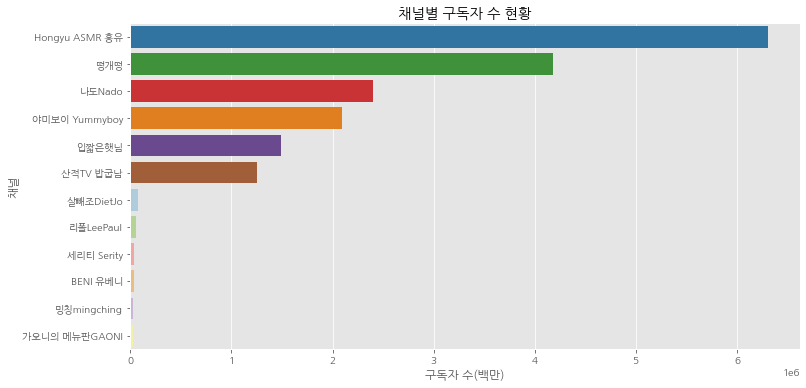

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(y='channel', x='subscribe', data=meta_all.sort_values(by='subscribe', ascending=False), palette=colors_pop + colors_unpop)
# sns.barplot(x='channel', y='subscribe', data=meta_unpopular, palette='summer')
plt.title('채널별 구독자 수 현황')
plt.ylabel('채널')
plt.xlabel('구독자 수(백만)')
plt.show()

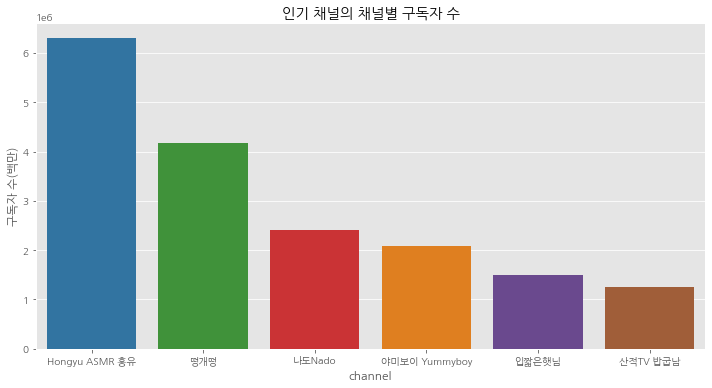

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='channel', y='subscribe', data=meta_popular, order=pop_order, palette=colors_pop)
plt.title('인기 채널의 채널별 구독자 수')
plt.ylabel('구독자 수(백만)')
plt.show()

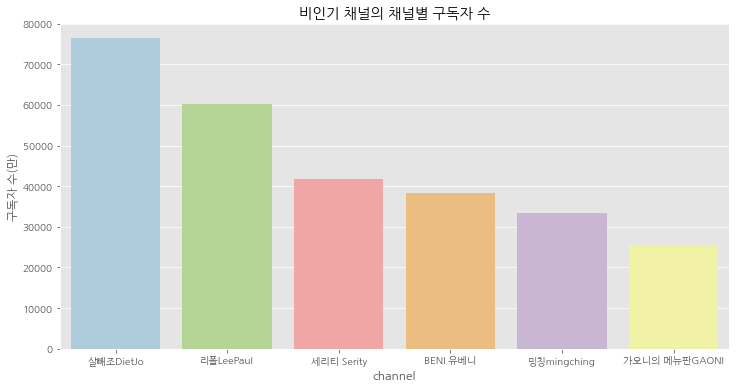

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x='channel', y='subscribe', data=meta_unpopular, order=unpop_order, palette=colors_unpop)
plt.title('비인기 채널의 채널별 구독자 수')
plt.ylabel('구독자 수(만)')
plt.show()

#### 인기 비인기 채널에 따라 업로드 주기가 확연히 다르다
인기 채널의 경우 새 영상 업로드까지 1~4일이 걸리는 반면, 비인기 채널의 경우 일주일이 소요됨

* 인기

In [11]:
pop_interval_dist = meta_popular.groupby('channel').apply(lambda x: x['interval'].value_counts() / x.shape[0]).reset_index().rename({'level_1':'interval', 'interval':'percentage'}, axis=1)
unpop_interval_dist = meta_unpopular.groupby('channel').apply(lambda x: x['interval'].value_counts() / x.shape[0]).reset_index().rename({'level_1':'interval', 'interval':'percentage'}, axis=1)

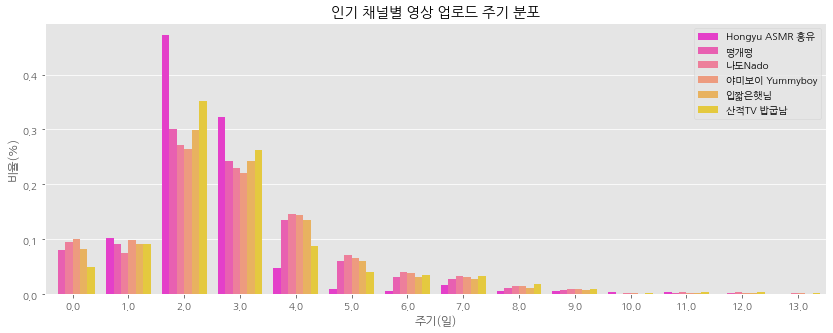

In [12]:
plt.figure(figsize=(14, 5))
sns.barplot(x='interval', y='percentage', hue='channel', hue_order=pop_order, data=pop_interval_dist, palette='spring')
plt.title('인기 채널별 영상 업로드 주기 분포')
plt.ylabel('비율(%)')
plt.xlabel('주기(일)')
plt.legend(loc='upper right')
plt.show()

* 비인기

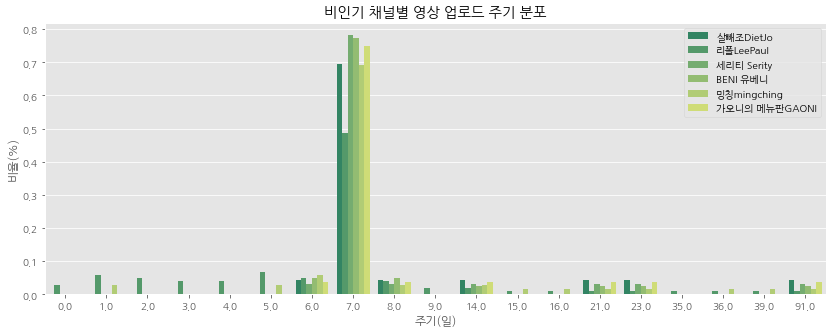

In [13]:
plt.figure(figsize=(14, 5))
sns.barplot(x='interval', y='percentage', hue='channel', hue_order=unpop_order, data=unpop_interval_dist, palette='summer')
plt.title('비인기 채널별 영상 업로드 주기 분포')
plt.ylabel('비율(%)')
plt.xlabel('주기(일)')
plt.legend(loc='upper right')
plt.show()

#### 인기/비인기 채널에 따라 영상 길이가 다름

인기채널에 비해 비인기 채널이 영상 길이가 더 길게 나타남

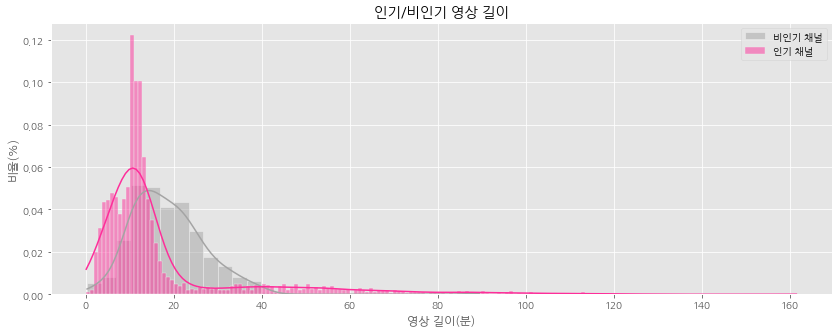

In [14]:
plt.figure(figsize=(14, 5))
sns.histplot(meta_unpopular['duration'], kde=True, stat='density', color='#A4A4A4', label='비인기 채널')
sns.histplot(meta_popular['duration'], kde=True, stat='density', color='#FE2E9A', label='인기 채널')
plt.title('인기/비인기 영상 길이')
plt.xlabel('영상 길이(분)')
plt.ylabel('비율(%)')
plt.legend()
plt.show()

* 인기 채널

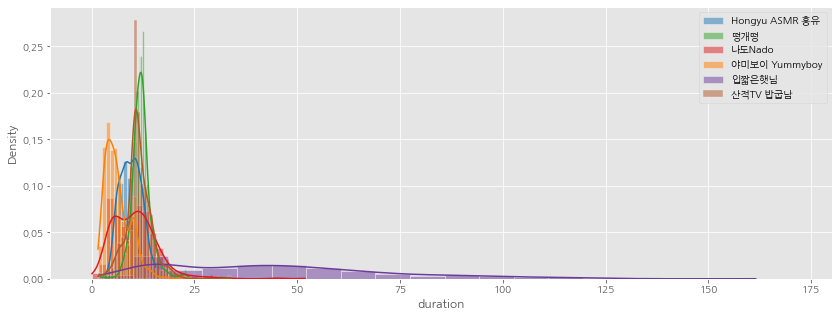

In [33]:
plt.figure(figsize=(14, 5))
for i in range(6):
    sns.histplot(meta_popular[meta_popular['channel']==pop_order[i]]['duration'], kde=True, color=colors_pop[i], label=pop_order[i], stat='density')
plt.legend(loc='upper right')
plt.xlim(-10, 180)
plt.show()

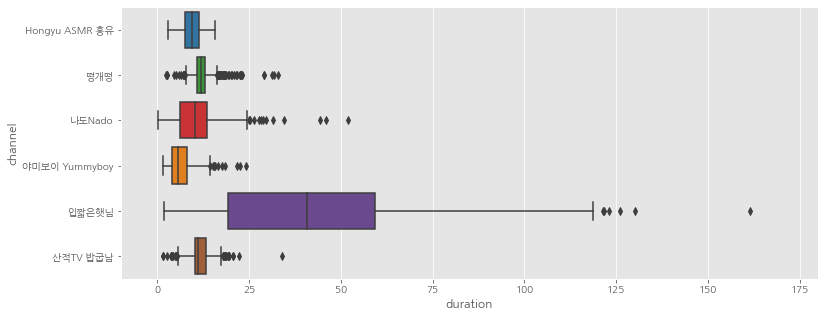

In [42]:
plt.figure(figsize=(12.5, 5))
sns.boxplot(y='channel', x='duration', data=meta_popular, order=pop_order, palette=colors_pop)
plt.xlim(-10, 180)
plt.show()

* 비인기 채널

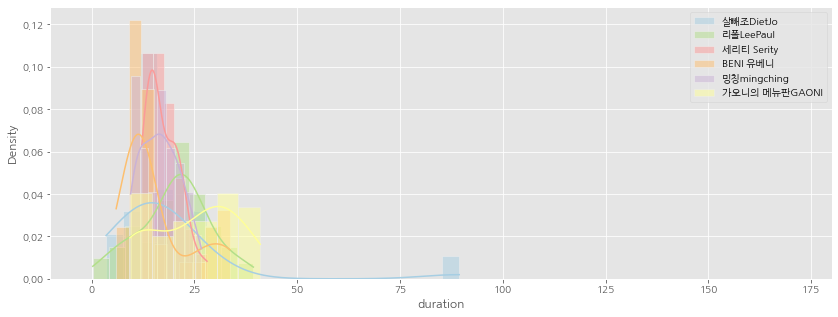

In [36]:
plt.figure(figsize=(14, 5))
for i in range(6):
    sns.histplot(meta_unpopular[meta_unpopular['channel']==unpop_order[i]]['duration'], 
                 kde=True, color=colors_unpop[i], label=unpop_order[i], stat='density')
plt.legend(loc='upper right')
plt.xlim(-10, 180)
plt.show()

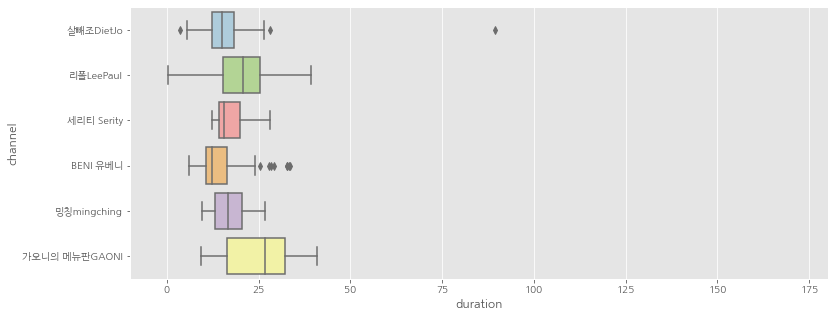

In [41]:
plt.figure(figsize=(12.5, 5))
sns.boxplot(y='channel', x='duration', data=meta_unpopular, order=unpop_order, palette=colors_unpop)
plt.xlim(-10, 180)
plt.show()

#### 조회수 추이

* 인기

'떡상 조회수'라고 부를만 한 기준?
- 평소에 업로드한 영상 대비 조회수가 몇 배 뛰었는지
- '평소'라는 것을 어떻게 정의할 것인지
    - 윈도우 사이즈를 설정해서 추이를 살펴볼 수도 있겠다

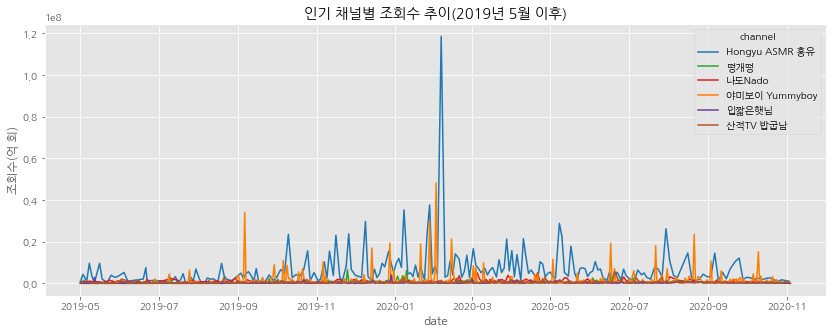

In [347]:
pop_current = meta_popular[meta_popular['date'] >= pd.to_datetime('2019-05-01')]

plt.figure(figsize=(14, 5))
sns.lineplot(x='date', y='view', hue='channel', hue_order=pop_order, data=pop_current, palette=colors_pop)
plt.title('인기 채널별 조회수 추이(2019년 5월 이후)')
plt.ylabel('조회수(억 회)')
plt.show()

In [425]:
def get_view_trend_pop(idx=0):
    temp = pop_current[pop_current['channel']==pop_order[idx]]
    n_sub = temp['subscribe'].iloc[0] / 10000
    threshold = temp[['view']].describe().loc['75%'].values[0]

    plt.figure(figsize=(14, 5))
    sns.lineplot(x='date', y='view', data= temp, color=colors_pop[idx], label=pop_order[idx])
    plt.hlines(y=threshold, xmin=pd.to_datetime('2019-05-01'), xmax=pd.to_datetime('2020-11-30'), color='gray')
    plt.legend()
    plt.title(f'{pop_order[idx]} 채널 조회수 추이 (구독자 {n_sub}만)')
    plt.ylabel('조회수')
    plt.show()
    print('평범한 영상 대비 떡상 영상 조회수 배율:', threshold / temp[temp['view'] < threshold][['view']].mean().values[0])

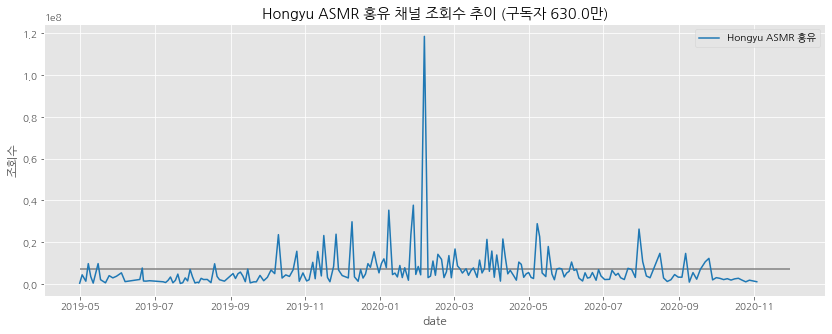

평범한 영상 대비 떡상 영상 조회수 배율: 2.217164753419736


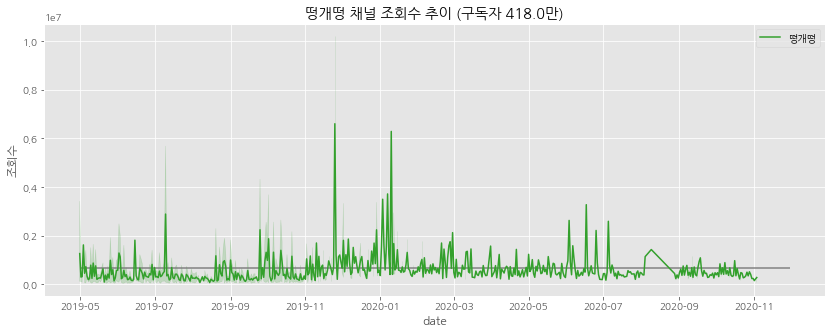

평범한 영상 대비 떡상 영상 조회수 배율: 2.2135716294289605


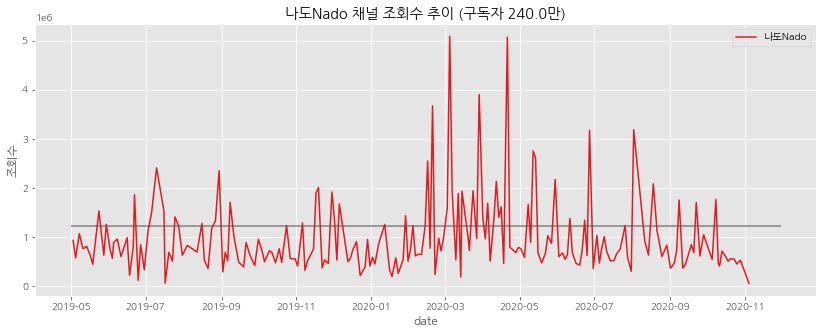

평범한 영상 대비 떡상 영상 조회수 배율: 1.92723415591374


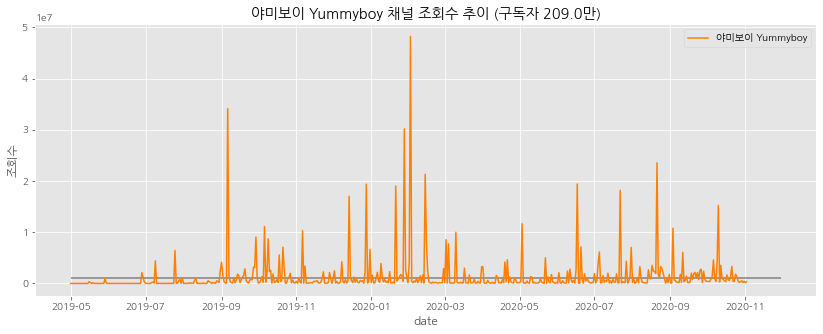

평범한 영상 대비 떡상 영상 조회수 배율: 4.391300177026613


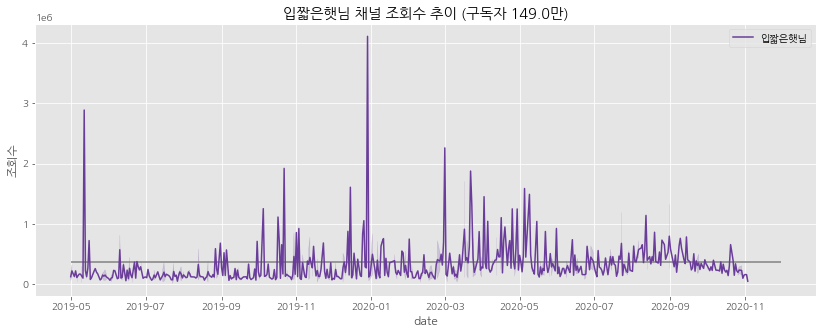

평범한 영상 대비 떡상 영상 조회수 배율: 2.0512309360954717


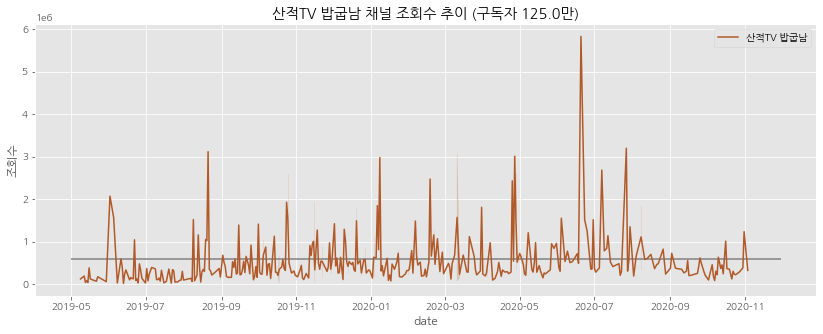

평범한 영상 대비 떡상 영상 조회수 배율: 2.0458270039673185


In [426]:
for i in range(6):
    get_view_trend_pop(i)

* 비인기

In [423]:
unpop_current = meta_unpopular[meta_unpopular['date'] >= pd.to_datetime('2019-05-01')]

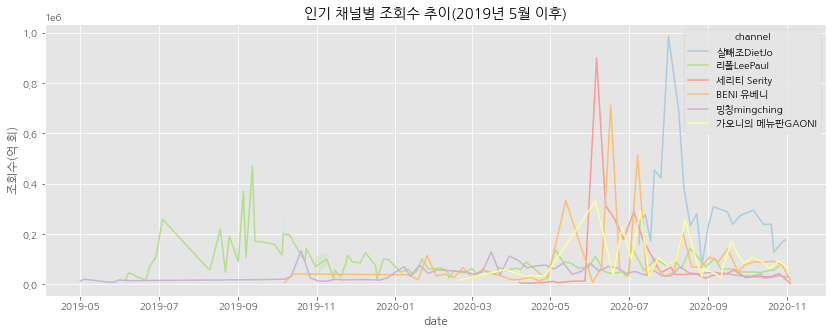

In [427]:
plt.figure(figsize=(14, 5))
sns.lineplot(x='date', y='view', hue='channel', hue_order=unpop_order, data=unpop_current, palette=colors_unpop)
plt.title('인기 채널별 조회수 추이(2019년 5월 이후)')
plt.ylabel('조회수(억 회)')
plt.show()

In [428]:
def get_view_trend_unpop(idx=0):
    temp = unpop_current[unpop_current['channel']==unpop_order[idx]]
    n_sub = temp['subscribe'].iloc[0] / 10000
    threshold = temp[['view']].describe().loc['75%'].values[0]

    plt.figure(figsize=(14, 5))
    sns.lineplot(x='date', y='view', data= temp, color=colors_unpop[idx], label=unpop_order[idx])
    plt.hlines(y=threshold, xmin=pd.to_datetime('2019-05-01'), xmax=pd.to_datetime('2020-11-30'), color='gray')
    plt.legend()
    plt.title(f'{unpop_order[idx]} 채널 조회수 추이 (구독자 {n_sub}만)')
    plt.ylabel('조회수')
    plt.show()
    print('평범한 영상 대비 떡상 영상 조회수 배율:', threshold / temp[temp['view'] < threshold][['view']].mean().values[0])

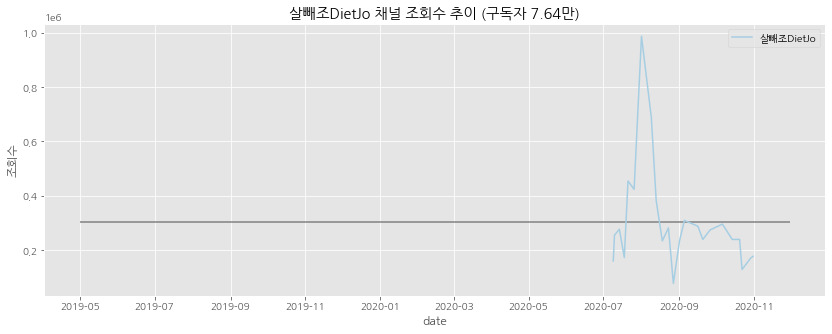

평범한 영상 대비 떡상 영상 조회수 배율: 1.375150314852758


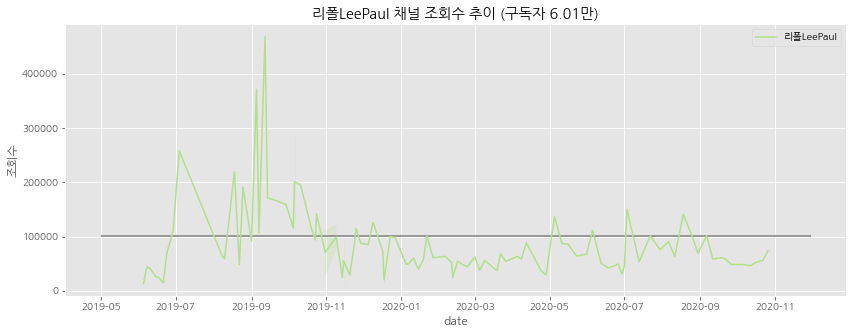

평범한 영상 대비 떡상 영상 조회수 배율: 1.7884641619601103


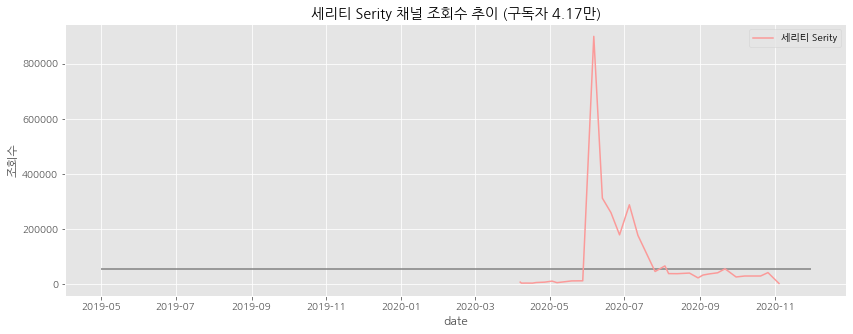

평범한 영상 대비 떡상 영상 조회수 배율: 2.3734063526051545


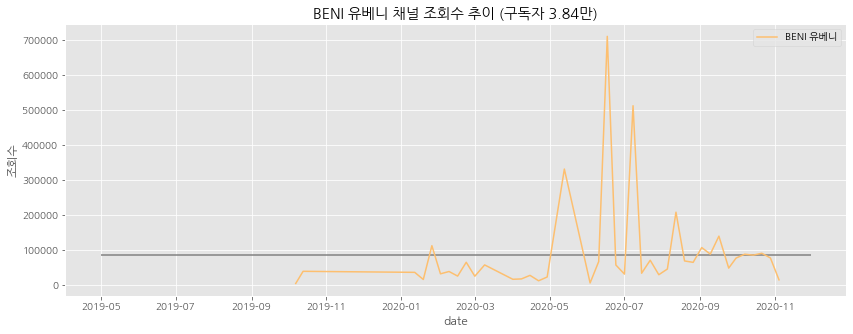

평범한 영상 대비 떡상 영상 조회수 배율: 2.0942543648797063


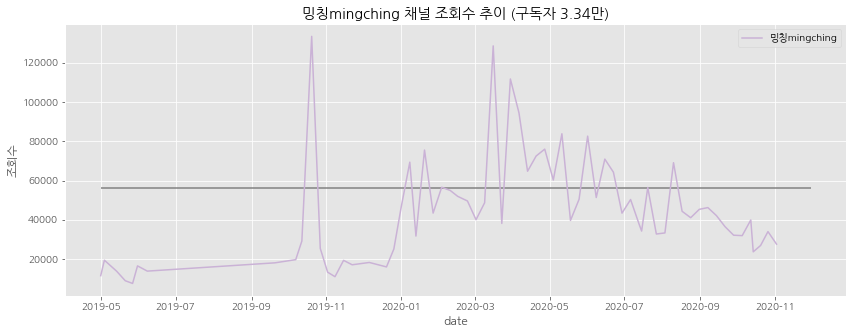

평범한 영상 대비 떡상 영상 조회수 배율: 1.7682034412694816


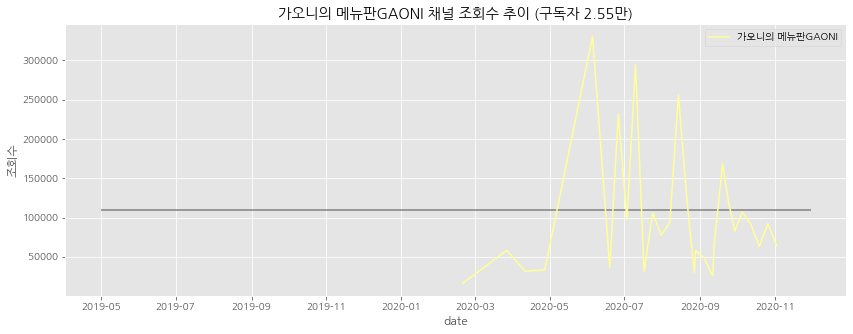

평범한 영상 대비 떡상 영상 조회수 배율: 1.7644885284662006


In [430]:
for i in range(6):
    get_view_trend_unpop(i)

In [348]:
# plt.figure(figsize=(14, 5))
# sns.lineplot(x='date', y='view', hue='channel', data=meta_popular, hue_order=pop_order, palette=colors_pop)
# plt.ylabel('조회수(억 회)')
# plt.title('인기 채널별 조회수 추이(2016년 이후)')
# plt.show()